In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Glass\Glass_AN_1.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,NaN,NaN,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	1
float64		column 2	1
float64		column 3	1
float64		column 4	4
float64		column 5	4
float64		column 6	1
float64		column 7	6
float64		column 8	0
float64		column 9	0


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
count,213.000000,213.000000,213.000000,210.000000,210.000000,213.000000,208.000000,214.000000,214.000000
mean,1.518350,13.416526,2.680610,1.448571,72.650524,0.497136,8.939760,0.175047,0.057009
std,0.003035,0.808582,1.444661,0.502102,0.772715,0.653727,1.392582,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516520,12.930000,2.090000,1.190000,72.280000,0.120000,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000
75%,1.519150,13.830000,3.600000,1.630000,73.080000,0.610000,9.140000,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


<AxesSubplot:>

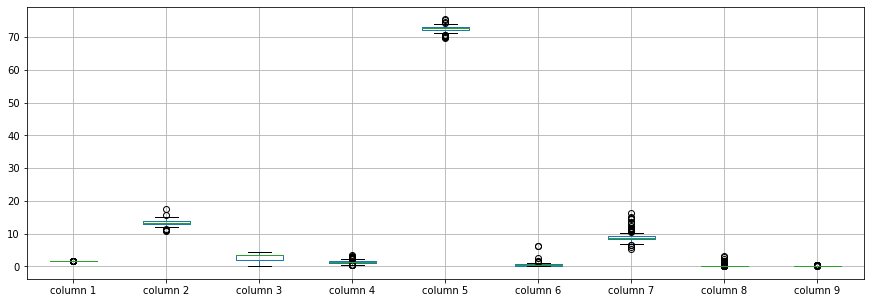

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1     1.518350
column 2    13.416526
column 3     2.680610
column 4     1.448571
column 5    72.650524
column 6     0.497136
column 7     8.939760
column 8     0.175047
column 9     0.057009
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
column 1,1.000000,-0.182870,-0.118287,-0.405938,-0.551811,-0.290522,0.829626,0.001447,0.146587
column 2,-0.182870,1.000000,-0.280925,0.160674,-0.069118,-0.269956,-0.275086,0.326912,-0.250839
column 3,-0.118287,-0.280925,1.000000,-0.485397,-0.152406,0.005176,-0.427948,-0.491833,0.084794
column 4,-0.405938,0.160674,-0.485397,1.000000,0.004196,0.324162,-0.242997,0.479131,-0.077845
column 5,-0.551811,-0.069118,-0.152406,0.004196,1.000000,-0.178402,-0.237875,-0.082876,-0.095661
column 6,-0.290522,-0.269956,0.005176,0.324162,-0.178402,1.000000,-0.303633,-0.042674,-0.007798
column 7,0.829626,-0.275086,-0.427948,-0.242997,-0.237875,-0.303633,1.000000,-0.081629,0.143465
column 8,0.001447,0.326912,-0.491833,0.479131,-0.082876,-0.042674,-0.081629,1.000000,-0.058692
column 9,0.146587,-0.250839,0.084794,-0.077845,-0.095661,-0.007798,0.143465,-0.058692,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [9,9+32,9+32+32,9+32+32+32,9+32+32+32+32,9+32+32+32+32+32,9+32+32+32+32+32+32,9+32+32+32+32+32,9+32+32+32+32,9+32+32+32,9+32+32,9+32,9], vae_layer = False, seed = 9)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [9]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 100.71222334641676
Epoch: 1 , loss: 100.7122063269982
Epoch: 2 , loss: 100.66275846041165
Epoch: 3 , loss: 100.69215745192308
Epoch: 4 , loss: 100.59531343900241
Epoch: 5 , loss: 100.7134299645057
Epoch: 6 , loss: 100.60643709622897
Epoch: 7 , loss: 100.57544884314903
Epoch: 8 , loss: 100.60201087364784
Epoch: 9 , loss: 100.58186751145583
Epoch: 10 , loss: 100.5154559795673
Epoch: 11 , loss: 100.54073744553786
Epoch: 12 , loss: 100.94332709679237
Epoch: 13 , loss: 100.54276099571815
Epoch: 14 , loss: 100.57407496525691
Epoch: 15 , loss: 100.89508115328275
Epoch: 16 , loss: 100.88855567345253
Epoch: 17 , loss: 100.5301501934345
Epoch: 18 , loss: 100.59214489276593
Epoch: 19 , loss: 100.47970111553485
Epoch: 20 , loss: 100.95287322998047
Epoch: 21 , loss: 100.54084719144382
Epoch: 22 , loss: 100.5666022667518
Epoch: 23 , loss: 100.51965625469501
Epoch: 24 , loss: 100.8969468336839
Epoch: 25 , loss: 100.48

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(214, 9)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     1.51966
column 2    14.77000
column 3     3.75000
column 4     0.29000
column 5    72.02000
column 6     0.03000
column 7     9.00000
column 8     0.00000
column 9     0.00000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Glass.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,-72.64309,-0.439679,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
209,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0
210,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0
211,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0
212,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(147.61840831189116, 1090.4359815890969)

In [17]:
NRMS=numerator/denominator
NRMS


0.13537558444904418

In [18]:
new_df.iloc[66,:]

column 1     1.52152
column 2    13.05000
column 3     3.65000
column 4     0.87000
column 5    72.22000
column 6     0.19000
column 7     9.85000
column 8     0.00000
column 9     0.17000
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,1.52101,13.64,4.49,1.10,71.78000,0.060000,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,0.08691,0.040321,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99000,0.390000,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61000,0.570000,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08000,0.550000,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61000,0.080000,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06000,0.000000,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42000,0.000000,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61000,0.000000,8.48,1.57,0.0


In [20]:
imputations[-1].to_excel("Glass_AN_1(imp).xlsx", index=False, header=False)